# PyEPR analysis notebook
This notebook is to do participation ratio analysis of the two chip cavity.

## Load packages and stuff

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy = True

In [2]:
import pyEPR as epr
import matplotlib.pylab as plt
import numpy as np
import pyEPR.calcs
from pyEPR.calcs import Convert
from pathlib import Path

%matplotlib inline

## Support Calculations

In [3]:
print(f"""For   L_J = 12.57 nH, the Josephson junction energy is
      E_J = {epr.calcs.Convert.Ej_from_Lj(12.57, 'nH', 'GHz'):.1f} GHz""")

For   L_J = 12.57 nH, the Josephson junction energy is
      E_J = 13.0 GHz


In [4]:
epr.calcs.Convert.Lj_from_Ej(22.77, 'nH', 'GHz')

7.1788103999464745

## Load Project

In [5]:
from pathlib import Path
path_to_project = Path(epr.__file__).parent.parent.parent.parent.parent / 'Documents\\Simulations\\HFSS\\twochip_3d'
print(f'We will do the project located in\n {path_to_project}')

We will do the project located in
 C:\Users\Public\miniconda3\envs\Documents\Simulations\HFSS\twochip_3d


In [6]:
path_to_project = r'C:\Users\Lehnert Lab\Documents\Sheng-Xiang\pyEPR\pablo'
pinfo = epr.ProjectInfo(project_path = path_to_project, 
                        project_name = 'TwochipV1_May24_22',
                        design_name  = 'V1')

INFO 10:52AM [connect_project]: Connecting to Ansys Desktop API...
INFO 10:52AM [load_ansys_project]: 	File path to HFSS project found.
INFO 10:52AM [load_ansys_project]: 	Opened Ansys App
INFO 10:52AM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 10:52AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Lehnert Lab/Documents/Sheng-Xiang/pyEPR/pablo/
	Project:   TwochipV1_May24_22
INFO 10:52AM [connect_design]: 	Opened active design
	Design:    V1 [Solution type: Eigenmode]
INFO 10:52AM [get_setup]: 	Opened setup `Setup1`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 10:52AM [connect]: 	Connected to project "TwochipV1_May24_22" and design "V1" 😀 



In [7]:
pinfo.get_all_variables_names()

['Boxx',
 'Boxy',
 'Boxz',
 'Cylh',
 'Chipx',
 'Chipy',
 'Chiph',
 'dispy',
 'PadLen',
 'PadWid',
 'Padsep',
 'JuncW',
 'JuncL',
 'LJ',
 'QubitYoff',
 'QubitXoff',
 'QubitZoff',
 'AcoustYoff',
 'AcoustXoff',
 'AcoustZoff',
 'APadL',
 'APadW',
 'APadsep',
 'SnailW',
 'SnailArea',
 'LJSnailS',
 'LJSnailM',
 'SnailOff',
 'AcousticsC']

## Define the Josephson Junctions

In [8]:
pinfo.junctions['j1'] = {'Lj_variable' : 'LJ', 
                         'rect'        : 'TransmonJJ', 
                         'line'        : 'Polyline1'}
pinfo.junctions['j2'] = {'Lj_variable' : 'LJSnailS', 
                         'rect'        : 'SnailSJJ', 
                         'line'        : 'Polyline2'}
pinfo.junctions['j3'] = {'Lj_variable' : 'LJSnailM', 
                         'rect'        : 'SnailMJJ1', 
                         'line'        : 'Polyline3'}
pinfo.junctions['j4'] = {'Lj_variable' : 'LJSnailM', 
                         'rect'        : 'SnailMJJ2', 
                         'line'        : 'Polyline4'}
pinfo.junctions['j5'] = {'Lj_variable' : 'LJSnailM', 
                         'rect'        : 'SnailMJJ3', 
                         'line'        : 'Polyline5'}
pinfo.validate_junction_info()  

## Run analysis

In [9]:
pinfo.setup.analyze()

INFO 10:52AM [analyze]: Analyzing setup Setup1


## Optimetrics?

In [10]:
pinfo.design.optimetrics.solve_setup(pinfo.design.optimetrics.get_setup_names()[0])

## More Analysis?

In [11]:
eprh = epr.DistributedAnalysis(pinfo)

Design "V1" info:
	# eigenmodes    5
	# variations    20


In [12]:
eprh.get_ansys_variables()

variation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AcousticsC,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF,60.000000000000007fF
AcoustXoff,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm
AcoustYoff,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm,-4.7999999999999998mm
AcoustZoff,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm
APadL,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm,0.20000000000000001mm
APadsep,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm,0.080000000000000002mm
APadW,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm,0.10000000000000001mm
Boxx,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm
Boxy,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm,25mm
Boxz,16.5mm,26.921052631578899mm,18.2368421052632mm,19.973684210526301mm,21.710526315789501mm,23.447368421052602mm,25.184210526315798mm,28.657894736842099mm,30.394736842105299mm,32.131578947368403mm,33.868421052631597mm,35.605263157894697mm,37.342105263157897mm,39.078947368421098mm,40.815789473684198mm,42.552631578947398mm,44.289473684210499mm,46.026315789473699mm,47.7631578947368mm,49.5mm


In [13]:
eprh.get_ansys_frequencies_all()

Freq. (GHz)  Quality Factor
variation mode                             
0         0        8.174697             inf
          1        9.631894             inf
          2       11.533924             inf
          3       12.405070             inf
          4       12.761321             inf
...                     ...             ...
19        0        5.850819             inf
          1        7.685894             inf
          2        7.976365             inf
          3       10.114447             inf
          4       10.538199             inf

[100 rows x 2 columns]

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 0
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


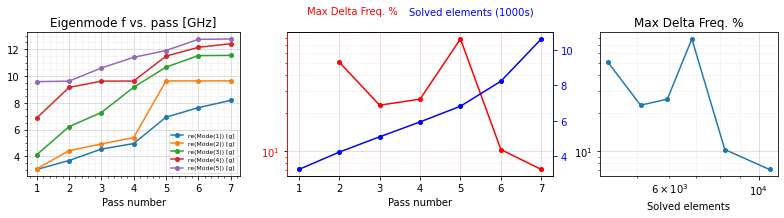

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 1
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


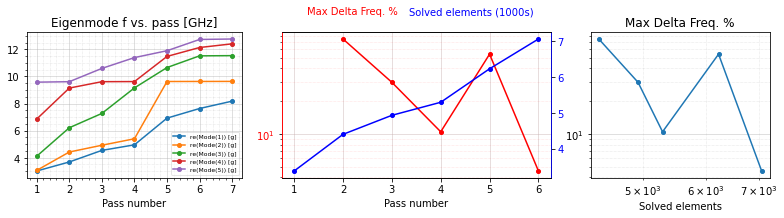

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 2
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


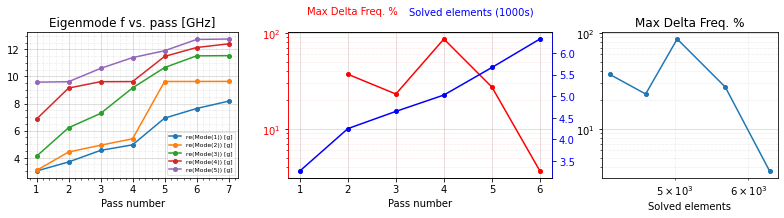

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 3
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


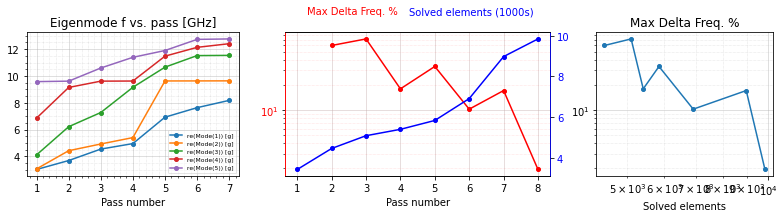

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 4
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


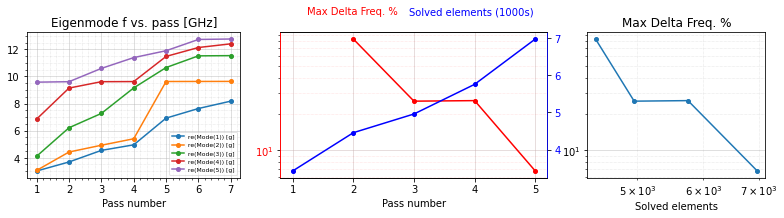

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 5
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


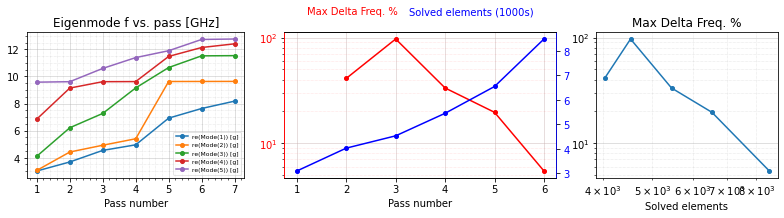

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 6
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


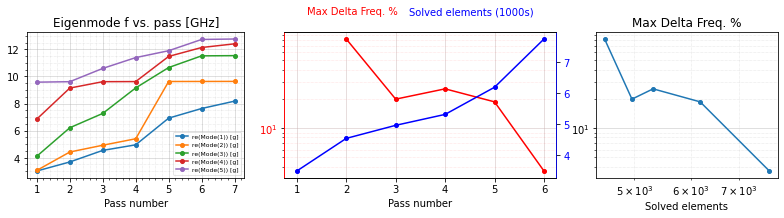

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 7
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


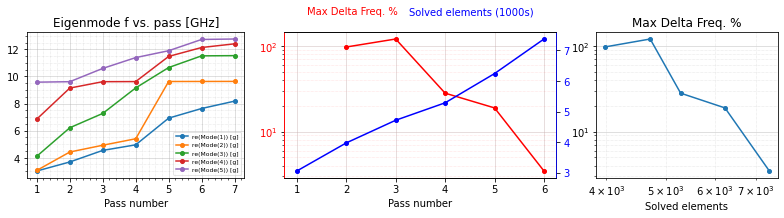

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 8
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


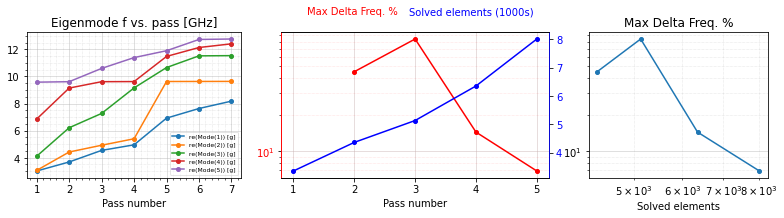

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 9
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


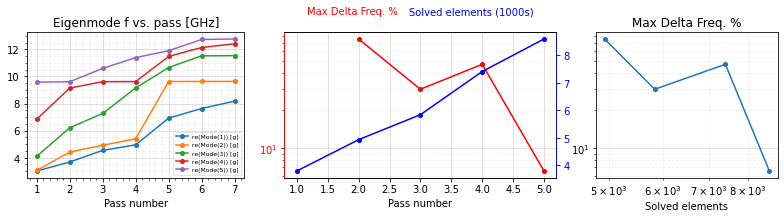

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 10
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


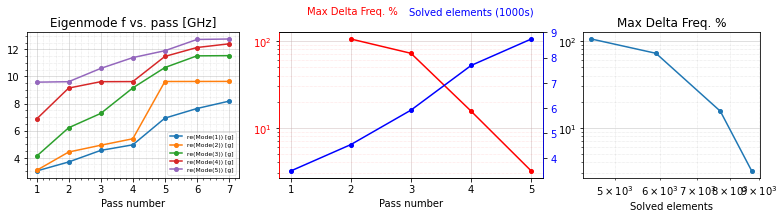

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 11
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


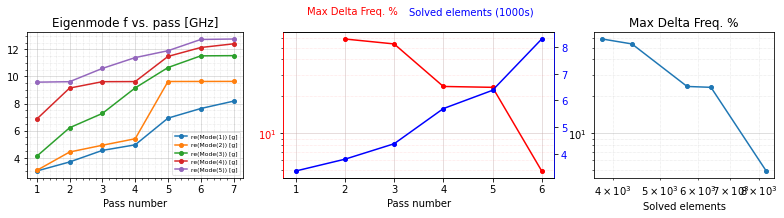

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 12
INFO 10:54AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


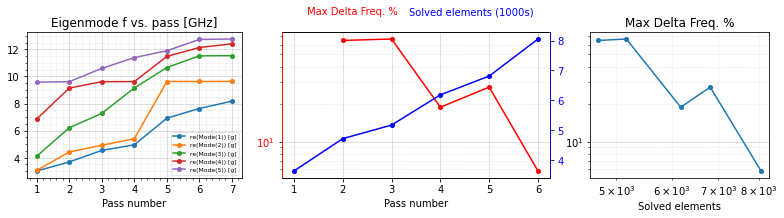

INFO 10:54AM [hfss_report_full_convergence]: Creating report for variation 13
INFO 10:55AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


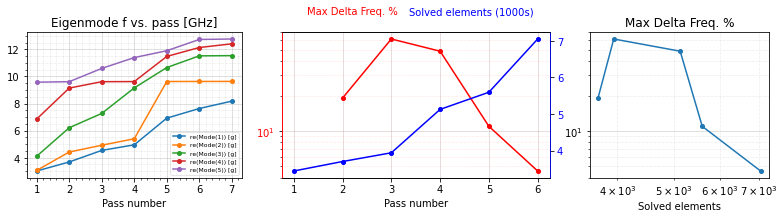

INFO 10:55AM [hfss_report_full_convergence]: Creating report for variation 14
INFO 10:55AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


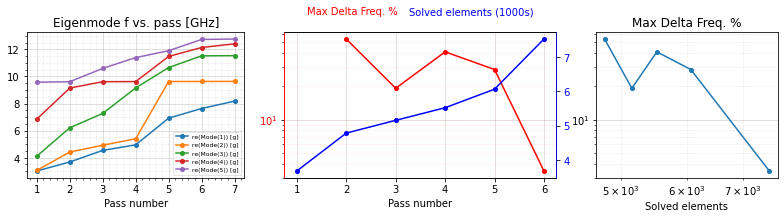

INFO 10:55AM [hfss_report_full_convergence]: Creating report for variation 15
INFO 10:55AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


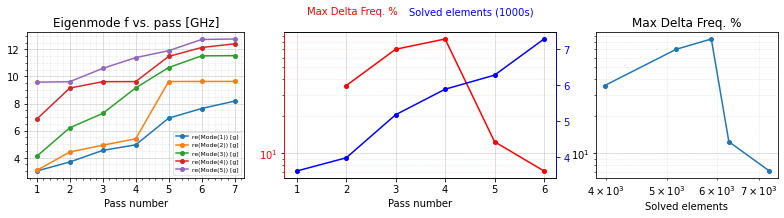

INFO 10:55AM [hfss_report_full_convergence]: Creating report for variation 16
INFO 10:55AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


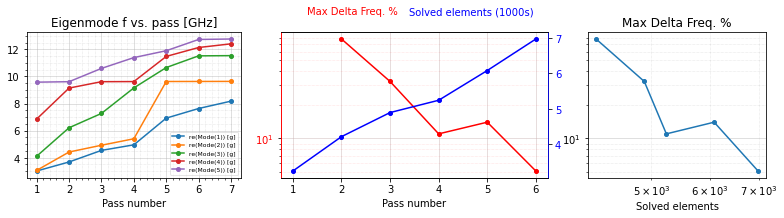

INFO 10:55AM [hfss_report_full_convergence]: Creating report for variation 17
INFO 10:55AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


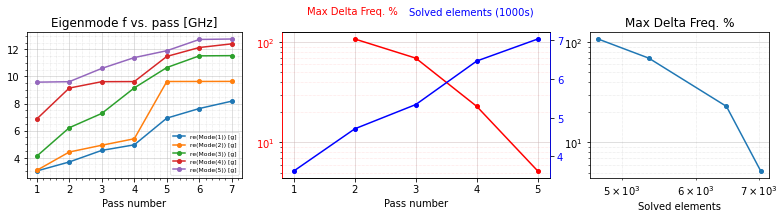

INFO 10:55AM [hfss_report_full_convergence]: Creating report for variation 18
INFO 10:55AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


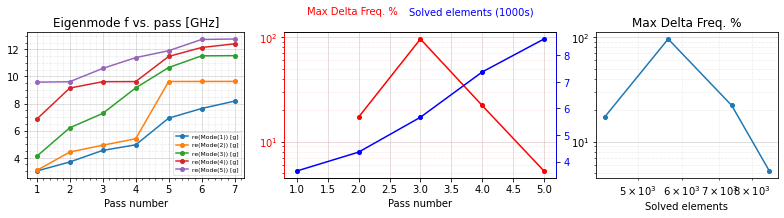

INFO 10:55AM [hfss_report_full_convergence]: Creating report for variation 19
INFO 10:55AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\TwochipV1_May24_22\V1\hfss_eig_f_convergence.csv


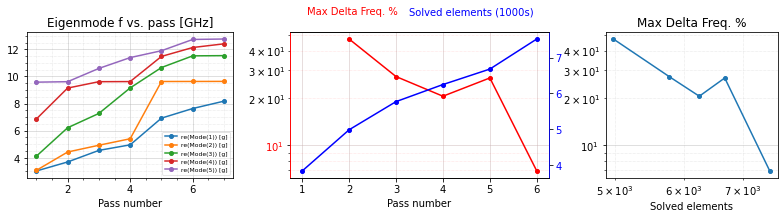

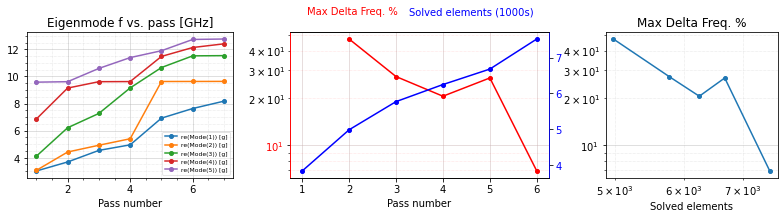

In [14]:
eprh.hfss_report_full_convergence();

## Full Analysis

In [15]:
eprh.do_EPR_analysis();


Variation 0  [1/20]

  Mode 0 at 8.17 GHz   [1/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  1.605e-25 1.608e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 93.78%
	j1              0.988984  (+)        0.065593
		Energy fraction (Lj over Lj&Cj)= 98.49%
	j2              1.10571e-08  (+)        1.69189e-10
		Energy fraction (Lj over Lj&Cj)= 98.75%
	j3              1.47249e-09  (+)        1.86465e-11
		Energy fraction (Lj over Lj&Cj)= 98.75%
	j4              1.46054e-09  (+)        1.84951e-11
		Energy fraction (Lj over Lj&Cj)= 98.75%
	j5              1.47073e-09  (+)        1.86241e-11
		(U_tot_cap-U_tot_ind)/mean=3.23%

  Mode 1 at 9.63 GHz   [2/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.3%  4.046e-23 4.034e-23

    Calculating

		Energy fraction (Lj over Lj&Cj)= 97.42%
	j4              0.314367  (+)        0.00831848
		Energy fraction (Lj over Lj&Cj)= 97.42%
	j5              0.315763  (+)        0.00835544
		(U_tot_cap-U_tot_ind)/mean=-51.12%

Variation 2  [3/20]

  Mode 0 at 7.37 GHz   [1/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.3%  2.408e-25 1.798e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 94.88%
	j1               0.99253  (+)        0.0535351
		Energy fraction (Lj over Lj&Cj)= 98.77%
	j2              5.83451e-09  (+)        7.26043e-11
		Energy fraction (Lj over Lj&Cj)= 98.98%
	j3              7.77344e-10  (+)        8.00542e-12
		Energy fraction (Lj over Lj&Cj)= 98.98%
	j4              7.75351e-10  (+)        7.9849e-12
		Energy fraction (Lj over Lj&Cj)= 98.98%
	j5              7.76238e-10  (+)   

    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               81.0%  6.732e-26 1.282e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_4j   sign s_4j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 86.82%
	j1              4.90838e-06  (+)        7.45417e-07
		Energy fraction (Lj over Lj&Cj)= 96.61%
	j2               3.11272  (+)        0.109059
		Energy fraction (Lj over Lj&Cj)= 97.18%
	j3              0.425671  (+)        0.0123427
		Energy fraction (Lj over Lj&Cj)= 97.18%
	j4              0.409843  (+)        0.0118838
		Energy fraction (Lj over Lj&Cj)= 97.18%
	j5              0.422056  (+)        0.0122379
		(U_tot_cap-U_tot_ind)/mean=-59.85%

Variation 4  [5/20]

  Mode 0 at 7.06 GHz   [1/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.3%  2.094e-25 1.544e-27

    Calculating junction energy participation ration (EPR)

		Energy fraction (Lj over Lj&Cj)= 97.55%
	j3              0.0001032  (+)        2.58811e-06
		Energy fraction (Lj over Lj&Cj)= 97.55%
	j4              0.000103601  (+)        2.59815e-06
		Energy fraction (Lj over Lj&Cj)= 97.55%
	j5              0.000102118  (+)        2.56096e-06
		(U_tot_cap-U_tot_ind)/mean=-0.04%

  Mode 4 at 12.11 GHz   [5/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               85.6%   1.57e-25 2.254e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_4j   sign s_4j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 87.30%
	j1              1.21584e-06  (+)        1.76918e-07
		Energy fraction (Lj over Lj&Cj)= 96.75%
	j2               2.71953  (+)        0.0912961
		Energy fraction (Lj over Lj&Cj)= 97.30%
	j3              0.367189  (+)        0.0102014
		Energy fraction (Lj over Lj&Cj)= 97.30%
	j4              0.369404  (+)        0.010263
		Energy

    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.1%  3.717e-22 3.715e-22

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 89.19%
	j1              0.000275548  (+)        3.33854e-05
		Energy fraction (Lj over Lj&Cj)= 97.28%
	j2              0.000611803  (+)        1.71015e-05
		Energy fraction (Lj over Lj&Cj)= 97.74%
	j3              8.30502e-05  (+)        1.92122e-06
		Energy fraction (Lj over Lj&Cj)= 97.74%
	j4              8.29266e-05  (+)        1.91836e-06
		Energy fraction (Lj over Lj&Cj)= 97.74%
	j5              8.25346e-05  (+)        1.90929e-06
		(U_tot_cap-U_tot_ind)/mean=-0.02%

  Mode 4 at 11.38 GHz   [5/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               -0.0%  1.011e-20 1.011e-20

    Calculating junction energy participation ration (EPR)

		Energy fraction (Lj over Lj&Cj)= 97.90%
	j4              1.48855e-07  (+)        3.19899e-09
		Energy fraction (Lj over Lj&Cj)= 97.90%
	j5              1.49853e-07  (+)        3.22044e-09
		(U_tot_cap-U_tot_ind)/mean=-0.00%

  Mode 3 at 10.87 GHz   [4/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  2.596e-22 2.594e-22

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 89.51%
	j1              0.000325341  (+)        3.81266e-05
		Energy fraction (Lj over Lj&Cj)= 97.37%
	j2              0.000271446  (+)        7.33896e-06
		Energy fraction (Lj over Lj&Cj)= 97.81%
	j3              3.69933e-05  (+)        8.27727e-07
		Energy fraction (Lj over Lj&Cj)= 97.81%
	j4              3.64276e-05  (+)        8.15069e-07
		Energy fraction (Lj over Lj&Cj)= 97.81%
	j5              3.66809e-05  (+)        8.

		Energy fraction (Lj over Lj&Cj)= 97.81%
	j2              5.42214e-09  (+)        1.21156e-10
		Energy fraction (Lj over Lj&Cj)= 98.18%
	j3              7.38568e-10  (+)        1.36577e-11
		Energy fraction (Lj over Lj&Cj)= 98.18%
	j4              7.35508e-10  (+)        1.36011e-11
		Energy fraction (Lj over Lj&Cj)= 98.18%
	j5              7.42067e-10  (+)        1.37224e-11
		(U_tot_cap-U_tot_ind)/mean=0.00%

  Mode 3 at 10.73 GHz   [4/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.1%  2.329e-22 2.328e-22

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 89.75%
	j1              0.000401069  (+)        4.58167e-05
		Energy fraction (Lj over Lj&Cj)= 97.43%
	j2              0.000259753  (+)        6.84586e-06
		Energy fraction (Lj over Lj&Cj)= 97.87%
	j3              3.51217e-05  (+)        7.6

		Energy fraction (Lj over Lj&Cj)= 92.16%
	j1              4.12217e-07  (+)        3.50533e-08
		Energy fraction (Lj over Lj&Cj)= 98.08%
	j2              1.53268e-10  (+)        3.0069e-12
		Energy fraction (Lj over Lj&Cj)= 98.40%
	j3              2.14261e-11  (+)        3.47875e-13
		Energy fraction (Lj over Lj&Cj)= 98.40%
	j4              2.10812e-11  (+)        3.42275e-13
		Energy fraction (Lj over Lj&Cj)= 98.40%
	j5              2.07986e-11  (+)        3.37687e-13
		(U_tot_cap-U_tot_ind)/mean=0.00%

  Mode 3 at 10.63 GHz   [4/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.1%  2.396e-22 2.394e-22

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 89.92%
	j1              0.000318905  (+)        3.5737e-05
		Energy fraction (Lj over Lj&Cj)= 97.48%
	j2              0.00103201  (+)        2.6681

    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  1.317e-19 1.317e-19

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 92.94%
	j1              8.04597e-07  (+)        6.11075e-08
		Energy fraction (Lj over Lj&Cj)= 98.28%
	j2              3.34186e-12  (+)        5.85553e-14
		Energy fraction (Lj over Lj&Cj)= 98.57%
	j3              4.10734e-13  (+)        5.95596e-15
		Energy fraction (Lj over Lj&Cj)= 98.57%
	j4              3.98447e-13  (+)        5.77779e-15
		Energy fraction (Lj over Lj&Cj)= 98.57%
	j5              4.17009e-13  (+)        6.04696e-15
		(U_tot_cap-U_tot_ind)/mean=0.00%

  Mode 3 at 10.54 GHz   [4/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.1%  8.607e-23 8.596e-23

    Calculating junction energy participation ration (EPR)


		Energy fraction (Lj over Lj&Cj)= 98.98%
	j3              1.58207e-09  (+)        1.62978e-11
		Energy fraction (Lj over Lj&Cj)= 98.98%
	j4              1.57463e-09  (+)        1.62211e-11
		Energy fraction (Lj over Lj&Cj)= 98.98%
	j5              1.5631e-09  (+)        1.61023e-11
		(U_tot_cap-U_tot_ind)/mean=2.67%

  Mode 2 at 8.33 GHz   [3/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  1.845e-19 1.845e-19

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 93.56%
	j1              4.5575e-07  (+)        3.13597e-08
		Energy fraction (Lj over Lj&Cj)= 98.44%
	j2              5.45202e-11  (+)        8.65496e-13
		Energy fraction (Lj over Lj&Cj)= 98.70%
	j3              7.29283e-12  (+)        9.58114e-14
		Energy fraction (Lj over Lj&Cj)= 98.70%
	j4              7.24793e-12  (+)        9.5221

		Energy fraction (Lj over Lj&Cj)= 94.46%
	j1              0.991878  (+)        0.058153
		Energy fraction (Lj over Lj&Cj)= 98.67%
	j2              1.74397e-08  (+)        2.35893e-10
		Energy fraction (Lj over Lj&Cj)= 98.89%
	j3              2.36911e-09  (+)        2.65201e-11
		Energy fraction (Lj over Lj&Cj)= 98.89%
	j4              2.35375e-09  (+)        2.63482e-11
		Energy fraction (Lj over Lj&Cj)= 98.89%
	j5              2.3589e-09  (+)        2.64058e-11
		(U_tot_cap-U_tot_ind)/mean=2.88%

  Mode 2 at 7.98 GHz   [3/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%   5.11e-20  5.11e-20

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 94.06%
	j1              3.43633e-06  (+)        2.16985e-07
		Energy fraction (Lj over Lj&Cj)= 98.56%
	j2              1.26984e-10  (+)        1.8499e-12


	 Differences in variations:


variation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
_Boxz,16.5mm,26.921052631578899mm,18.2368421052632mm,19.973684210526301mm,21.710526315789501mm,23.447368421052602mm,25.184210526315798mm,28.657894736842099mm,30.394736842105299mm,32.131578947368403mm,33.868421052631597mm,35.605263157894697mm,37.342105263157897mm,39.078947368421098mm,40.815789473684198mm,42.552631578947398mm,44.289473684210499mm,46.026315789473699mm,47.7631578947368mm,49.5mm


ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 120.1% is > 15%.                     
Is the simulation converged? Proceed with caution





 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization


ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 120.1% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.067006
1    1.042215
2    0.999678
3    0.242756
4    0.553875
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0   True  False  False  False  False
1  False  False  False  False  False
2  False  False  False  False  False
3  False   True   True   True   True
4  False  False  False  False  False

*** Different parameters


_Boxz    16.5mm
Name: 0, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 102.2% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
         j1            j2            j3            j4            j5
0  0.928106  1.037646e-08  1.381851e-09  1.370634e-09  1.380196e-09
1  0.002834  3.235825e-05  4.360279e-06  4.315010e-06  4.355145e-06
2  0.000007  9.102937e-07  1.232550e-07  1.216831e-07  1.229033e-07
3  0.000010  2.725677e+00  3.690361e-01  3.633117e-01  3.685004e-01
4  0.000258  5.128303e-03  6.935408e-04  6.806931e-04  6.947239e-04

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
      0.99    1e-08  1.4e-09  1.4e-09  1.4e-09
    0.0028  3.2e-05  4.4e-06  4.3e-06  4.4e-06
   6.6e-06  9.1e-07  1.2e-07  1.2e-07  1.2e-07
     1e-05     0.66     0.09    0.088    0.089
   0.00026   0.0051  0.00069  0.00068  0.00069

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity,

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 102.2% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.026313
1    1.062316
2    0.757280
3    3.487416
4    0.318493
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False   True   True   True   True

*** Different parameters


_Boxz    26.921052631578899mm
Name: 1, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  5.802971e-03  1.025562e-05  1.375472e-06  1.368690e-06  1.368423e-06
1  9.299204e-01  1.405706e-07  1.893782e-08  1.882496e-08  1.883037e-08
2  3.557270e-04  1.099175e-03  1.491322e-04  1.472834e-04  1.477481e-04
3  1.240903e-07  4.483492e-05  6.065737e-06  5.919980e-06  6.010523e-06
4  1.121198e-06  2.138709e+00  2.898976e-01  2.856943e-01  2.869636e-01

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
    0.0058    1e-05  1.4e-06  1.4e-06  1.4e-06
      0.99  1.4e-07  1.9e-08  1.9e-08  1.9e-08
   0.00036   0.0011  0.00015  0.00015  0.00015
   1.2e-07  4.5e-05  6.1e-06  5.9e-06    6e-06
   1.1e-06     0.68    0.092    0.091    0.091

*** Chi matrix O1 PT (MHz)
  

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.053747e+00
1    1.033945e+00
2    7.972990e+06
3    3.374058e+00
4    3.013029e-01
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0   True  False  False  False  False
1  False  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False   True   True   True   True

*** Different parameters


_Boxz    18.2368421052632mm
Name: 2, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 119.7% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  9.420948e-01  5.538028e-09  7.378435e-10  7.359515e-10  7.367934e-10
1  1.754724e-03  3.401212e-05  4.592328e-06  4.582491e-06  4.580605e-06
2  1.252344e-07  2.474587e-11  6.787703e-12  6.986537e-11  7.021537e-11
3  3.095924e-06  1.065944e-06  1.439176e-07  1.401852e-07  1.502303e-07
4  6.688062e-06  2.216707e+00  3.003586e-01  3.000041e-01  2.988348e-01

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
      0.99  5.5e-09  7.4e-10  7.4e-10  7.4e-10
    0.0018  3.4e-05  4.6e-06  4.6e-06  4.6e-06
   1.3e-07  2.5e-11  6.8e-12    7e-11    7e-11
   3.1e-06  1.1e-06  1.4e-07  1.4e-07  1.5e-07
   6.7e-06     0.67     0.09     0.09     0.09

*** Chi matrix O1 PT (MHz)
  

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 119.7% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.064508
1    1.041790
2    0.725763
3    0.535595
4    0.244622
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0   True  False  False  False  False
1  False  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False   True   True   True   True

*** Different parameters


_Boxz    19.973684210526301mm
Name: 3, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 199.9% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
         j1            j2            j3            j4            j5
0  0.799172  1.542349e-06  2.080726e-07  2.039671e-07  2.072120e-07
1  0.144692  1.207294e-05  1.631189e-06  1.597987e-06  1.624178e-06
2  0.000006  2.435400e-08  3.210598e-09  3.098023e-09  3.505284e-09
3  0.000359  2.982935e-03  4.071895e-04  3.929146e-04  4.057632e-04
4  0.000004  2.717287e+00  3.715951e-01  3.577780e-01  3.684393e-01

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
      0.85  1.5e-06  2.1e-07    2e-07  2.1e-07
      0.14  1.2e-05  1.6e-06  1.6e-06  1.6e-06
   5.9e-06  2.4e-08  3.2e-09  3.1e-09  3.5e-09
   0.00036    0.003  0.00041  0.00039  0.00041
   4.3e-06     0.66    0.091    0.088     0.09

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity,

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 199.9% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0       1.049429
1    7114.940470
2       1.032208
3      14.063029
4       0.670066
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0   True  False  False  False  False
1  False  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False  False  False  False  False

*** Different parameters


_Boxz    21.710526315789501mm
Name: 4, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 111.7% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
         j1            j2            j3            j4            j5
0  0.946041  9.080824e-09  1.229590e-09  1.208737e-09  1.185575e-09
1  0.000141  9.148725e-11  1.252907e-11  1.228187e-11  1.198374e-11
2  0.002529  1.535292e-05  2.109175e-06  2.065513e-06  2.011373e-06
3  0.000003  8.269928e-07  1.129909e-07  1.094353e-07  1.192428e-07
4  0.000167  2.372952e-03  3.352970e-04  3.226732e-04  3.044114e-04

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
      0.99  9.1e-09  1.2e-09  1.2e-09  1.2e-09
   0.00014  9.1e-11  1.3e-11  1.2e-11  1.2e-11
    0.0025  1.5e-05  2.1e-06  2.1e-06    2e-06
   3.3e-06  8.3e-07  1.1e-07  1.1e-07  1.2e-07
   0.00017   0.0024  0.00034  0.00032   0.0003

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity,

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 111.7% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.032437
1    1.062145
2    0.289089
3    0.721368
4    0.277156
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False   True   True   True   True

*** Different parameters


_Boxz    23.447368421052602mm
Name: 5, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
         j1            j2            j3            j4            j5
0  0.064130  8.791386e-06  1.178283e-06  1.178208e-06  1.172360e-06
1  0.876277  7.891066e-07  1.059649e-07  1.059831e-07  1.054062e-07
2  0.000130  2.697305e-04  3.648843e-05  3.696518e-05  3.620773e-05
3  0.000208  7.627206e-04  1.031943e-04  1.035947e-04  1.021118e-04
4  0.000001  2.424151e+00  3.273073e-01  3.292818e-01  3.236422e-01

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
     0.064  8.8e-06  1.2e-06  1.2e-06  1.2e-06
      0.93  7.9e-07  1.1e-07  1.1e-07  1.1e-07
   0.00013  0.00027  3.6e-05  3.7e-05  3.6e-05
   0.00021  0.00076   0.0001   0.0001   0.0001
   1.1e-06     0.67    0.091    0.091     0.09

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity,

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.048764e+00
1    1.028158e+00
2    1.290735e+05
3    1.179925e+07
4    6.937816e-01
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0   True  False  False  False  False
1  False  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False  False  False  False  False

*** Different parameters


_Boxz    25.184210526315798mm
Name: 6, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  9.429945e-01  4.430744e-08  5.902830e-09  5.991653e-09  5.882446e-09
1  7.076679e-03  1.331045e-05  1.781044e-06  1.811689e-06  1.773722e-06
2  7.747364e-06  8.437730e-13  1.133337e-13  1.156503e-13  1.127577e-13
3  8.470477e-08  2.945626e-11  4.372469e-13  3.864230e-12  5.087838e-12
4  1.608719e-04  1.898852e-03  2.545379e-04  2.643820e-04  2.518459e-04

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
      0.99  4.4e-08  5.9e-09    6e-09  5.9e-09
    0.0071  1.3e-05  1.8e-06  1.8e-06  1.8e-06
   7.7e-06  8.4e-13  1.1e-13  1.2e-13  1.1e-13
   8.5e-08  2.9e-11  4.4e-13  3.9e-12  5.1e-12
   0.00016   0.0019  0.00025  0.00026  0.00025

*** Chi matrix O1 PT (MHz)
  

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0         1.024776
1         1.058523
2    355129.109029
3         0.784291
4         2.853294
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False  False  False  False  False

*** Different parameters


_Boxz    28.657894736842099mm
Name: 7, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  5.260597e-03  1.064552e-05  1.429890e-06  1.425726e-06  1.429674e-06
1  9.345302e-01  1.211634e-07  1.634769e-08  1.630346e-08  1.633344e-08
2  2.815807e-06  1.972988e-12  2.540287e-13  3.466118e-13  2.563578e-13
3  2.755324e-04  6.117686e-04  8.304555e-05  8.292195e-05  8.252999e-05
4  5.710462e-08  1.875529e-05  2.556541e-06  2.471209e-06  2.535756e-06

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
    0.0053  1.1e-05  1.4e-06  1.4e-06  1.4e-06
      0.99  1.2e-07  1.6e-08  1.6e-08  1.6e-08
   2.8e-06    2e-12  2.5e-13  3.5e-13  2.6e-13
   0.00028  0.00061  8.3e-05  8.3e-05  8.3e-05
   5.7e-08  1.9e-05  2.6e-06  2.5e-06  2.5e-06

*** Chi matrix O1 PT (MHz)
  

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.023265e+00
1    1.053939e+00
2    1.184977e+06
3    6.515826e-01
4    7.208164e-01
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False  False  False  False  False

*** Different parameters


_Boxz    30.394736842105299mm
Name: 8, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  6.199701e-03  6.228256e-06  8.497409e-07  8.197292e-07  8.264293e-07
1  9.379692e-01  7.708653e-08  1.058193e-08  1.019287e-08  1.026116e-08
2  8.438596e-07  1.571898e-11  2.156032e-12  2.182244e-12  2.406696e-12
3  2.499302e-04  5.341583e-04  7.469937e-05  7.113907e-05  7.093226e-05
4  5.042881e-06  3.495750e-05  4.892497e-06  4.646109e-06  4.611497e-06

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
    0.0062  6.2e-06  8.5e-07  8.2e-07  8.3e-07
      0.99  7.7e-08  1.1e-08    1e-08    1e-08
   8.4e-07  1.6e-11  2.2e-12  2.2e-12  2.4e-12
   0.00025  0.00053  7.5e-05  7.1e-05  7.1e-05
     5e-06  3.5e-05  4.9e-06  4.6e-06  4.6e-06

*** Chi matrix O1 PT (MHz)
  

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.022275e+00
1    1.058687e+00
2    9.738214e-01
3    8.685551e-01
4    2.014748e+06
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False  False  False  False  False

*** Different parameters


_Boxz    32.131578947368403mm
Name: 9, dtype: object



*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  2.017782e-03  5.681219e-06  7.611322e-07  7.554709e-07  7.585677e-07
1  9.369886e-01  3.901868e-08  5.273904e-09  5.227152e-09  5.251256e-09
2  4.811352e-06  1.107853e-06  1.510880e-07  1.488546e-07  1.498530e-07
3  3.253256e-04  2.714329e-04  3.699148e-05  3.642581e-05  3.667912e-05
4  4.961859e-07  8.867639e-11  1.259296e-11  1.615852e-11  7.466585e-14

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
     0.002  5.7e-06  7.6e-07  7.6e-07  7.6e-07
      0.99  3.9e-08  5.3e-09  5.2e-09  5.3e-09
   4.8e-06  1.1e-06  1.5e-07  1.5e-07  1.5e-07
   0.00033  0.00027  3.7e-05  3.6e-05  3.7e-05
     5e-07  8.9e-11  1.3e-11  1.6e-11  7.5e-14

*** Chi matrix O1 PT (MHz)
  

_Boxz    33.868421052631597mm
Name: 10, dtype: object



*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  1.386382e-03  4.818320e-06  6.427169e-07  6.493096e-07  6.322179e-07
1  9.387220e-01  2.659650e-08  3.584204e-09  3.629469e-09  3.510724e-09
2  1.078709e-06  4.969408e-08  6.757992e-09  6.895026e-09  6.530520e-09
3  3.080899e-04  2.860653e-04  3.880917e-05  3.967311e-05  3.737515e-05
4  3.859983e-07  2.676460e-05  3.600396e-06  3.703484e-06  3.515511e-06

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
    0.0014  4.8e-06  6.4e-07  6.5e-07  6.3e-07
      0.99  2.7e-08  3.6e-09  3.6e-09  3.5e-09
   1.1e-06    5e-08  6.8e-09  6.9e-09  6.5e-09
   0.00031  0.00029  3.9e-05    4e-05  3.7e-05
   3.9e-07  2.7e-05  3.6e-06  3.7e-06  3.5e-06

*** Chi matrix O1 PT (MHz)
  

_Boxz    35.605263157894697mm
Name: 11, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  6.300201e-04  4.791017e-06  6.388839e-07  6.362991e-07  6.416028e-07
1  9.345430e-01  2.310782e-08  3.120714e-09  3.108208e-09  3.135453e-09
2  9.510316e-07  5.422140e-09  7.385677e-10  7.355083e-10  7.420665e-10
3  4.010474e-04  2.597390e-04  3.511976e-05  3.498313e-05  3.532713e-05
4  5.252943e-07  1.486937e-05  2.014879e-06  2.004250e-06  2.010983e-06

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
   0.00063  4.8e-06  6.4e-07  6.4e-07  6.4e-07
      0.99  2.3e-08  3.1e-09  3.1e-09  3.1e-09
   9.5e-07  5.4e-09  7.4e-10  7.4e-10  7.4e-10
    0.0004  0.00026  3.5e-05  3.5e-05  3.5e-05
   5.3e-07  1.5e-05    2e-06    2e-06    2e-06

*** Chi matrix O1 PT (MHz)
  

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 200.0% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.019643e+00
1    1.057423e+00
2    1.046571e+00
3    9.049204e-01
4    1.089501e+06
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False  False  False  False  False

*** Different parameters


_Boxz    37.342105263157897mm
Name: 12, dtype: object

ERROR 11:06AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 199.7% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  9.040362e-04  4.203450e-06  5.636108e-07  5.584187e-07  5.564208e-07
1  9.395612e-01  1.817488e-08  2.468720e-09  2.438050e-09  2.422225e-09
2  4.911607e-07  6.415331e-10  8.894433e-11  8.723920e-11  8.628251e-11
3  3.117039e-04  1.826523e-04  2.518741e-05  2.458077e-05  2.415076e-05
4  9.176277e-07  1.046208e-12  2.672434e-11  8.280739e-12  7.906622e-11

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
    0.0009  4.2e-06  5.6e-07  5.6e-07  5.6e-07
      0.99  1.8e-08  2.5e-09  2.4e-09  2.4e-09
   4.9e-07  6.4e-10  8.9e-11  8.7e-11  8.6e-11
   0.00031  0.00018  2.5e-05  2.5e-05  2.4e-05
   9.2e-07    1e-12  2.7e-11  8.3e-12  7.9e-11

*** Chi matrix O1 PT (MHz)
  

ERROR 11:07AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 199.7% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.017806e+00
1    1.054829e+00
2    1.045603e+00
3    7.819407e-01
4    7.451578e+06
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False  False  False  False  False

*** Different parameters


_Boxz    39.078947368421098mm
Name: 13, dtype: object



*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  9.231978e-04  8.739455e-06  1.178377e-06  1.166052e-06  1.166320e-06
1  9.414290e-01  3.947469e-08  5.377366e-09  5.299925e-09  5.297061e-09
2  4.122166e-07  1.532682e-10  2.142613e-11  2.108124e-11  2.079863e-11
3  3.188819e-04  1.031933e-03  1.422818e-04  1.381654e-04  1.376981e-04
4  1.186411e-07  9.349881e-09  5.632354e-10  4.372083e-09  1.086125e-09

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
   0.00092  8.7e-06  1.2e-06  1.2e-06  1.2e-06
      0.99  3.9e-08  5.4e-09  5.3e-09  5.3e-09
   4.1e-07  1.5e-10  2.1e-11  2.1e-11  2.1e-11
   0.00032    0.001  0.00014  0.00014  0.00014
   1.2e-07  9.3e-09  5.6e-10  4.4e-09  1.1e-09

*** Chi matrix O1 PT (MHz)
  

_Boxz    40.815789473684198mm
Name: 14, dtype: object

ERROR 11:07AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 82.5% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  4.274069e-04  5.081992e-06  6.747064e-07  6.601074e-07  6.982712e-07
1  9.355804e-01  1.918306e-08  2.575648e-09  2.479035e-09  2.721834e-09
2  6.398477e-07  2.032298e-11  2.867954e-12  2.719151e-12  3.091004e-12
3  4.085148e-04  2.305310e-04  3.080910e-05  2.857826e-05  3.420466e-05
4  7.091668e-06  4.037494e-04  5.362013e-05  4.919187e-05  6.060889e-05

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
   0.00043  5.1e-06  6.7e-07  6.6e-07    7e-07
      0.99  1.9e-08  2.6e-09  2.5e-09  2.7e-09
   6.4e-07    2e-11  2.9e-12  2.7e-12  3.1e-12
   0.00041  0.00023  3.1e-05  2.9e-05  3.4e-05
   7.1e-06   0.0004  5.4e-05  4.9e-05  6.1e-05

*** Chi matrix O1 PT (MHz)
  

ERROR 11:07AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 82.5% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.015947
1    1.061060
2    1.039824
3    0.789775
4    0.410056
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False   True   True   True   True

*** Different parameters


_Boxz    42.552631578947398mm
Name: 15, dtype: object

ERROR 11:07AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 64.8% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  3.892079e-04  7.446725e-06  9.972159e-07  9.924141e-07  9.963692e-07
1  9.361293e-01  2.953324e-08  3.999401e-09  3.971275e-09  3.990366e-09
2  8.045973e-07  3.341857e-12  4.107336e-13  3.984466e-13  4.170089e-13
3  4.338454e-04  1.274316e-03  1.727554e-04  1.707052e-04  1.718497e-04
4  4.418894e-06  1.656034e+00  2.242606e-01  2.213341e-01  2.229794e-01

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
   0.00039  7.4e-06    1e-06  9.9e-07    1e-06
      0.99    3e-08    4e-09    4e-09    4e-09
     8e-07  3.3e-12  4.1e-13    4e-13  4.2e-13
   0.00043   0.0013  0.00017  0.00017  0.00017
   4.4e-06     0.68    0.092    0.091    0.091

*** Chi matrix O1 PT (MHz)
  

ERROR 11:07AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 64.8% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.015716
1    1.056500
2    1.035701
3    0.819443
4    0.472690
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False   True   True   True  False

*** Different parameters


_Boxz    44.289473684210499mm
Name: 16, dtype: object

ERROR 11:07AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 198.3% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  4.713576e-04  7.110502e-06  9.465409e-07  9.647724e-07  9.372937e-07
1  9.405617e-01  2.507554e-08  3.365820e-09  3.449555e-09  3.325723e-09
2  5.864165e-07  1.642870e-10  2.175147e-11  2.246436e-11  2.143479e-11
3  4.188823e-04  7.744292e-04  1.035274e-04  1.076929e-04  1.017179e-04
4  2.853357e-05  1.134316e+00  1.512511e-01  1.578500e-01  1.484317e-01

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
   0.00047  7.1e-06  9.5e-07  9.6e-07  9.4e-07
      0.99  2.5e-08  3.4e-09  3.4e-09  3.3e-09
   5.9e-07  1.6e-10  2.2e-11  2.2e-11  2.1e-11
   0.00042  0.00077   0.0001  0.00011   0.0001
   2.9e-05     0.54    0.071    0.075     0.15

*** Chi matrix O1 PT (MHz)
  

ERROR 11:07AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 198.3% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0        1.017131
1        1.054951
2        1.028860
3    19741.643037
4        4.542304
dtype: float64

Pm_norm idx =
      j1     j2     j3     j4     j5
0  False  False  False  False  False
1   True  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False  False  False  False  False

*** Different parameters


_Boxz    46.026315789473699mm
Name: 17, dtype: object



*** P (participation matrix, not normlz.)
             j1            j2            j3            j4            j5
0  5.362249e-04  3.617643e-06  4.826522e-07  4.810746e-07  4.789694e-07
1  9.417663e-01  1.111303e-08  1.501683e-09  1.494623e-09  1.483672e-09
2  4.557503e-07  5.452019e-11  7.292833e-12  7.247926e-12  7.184591e-12
3  4.990879e-05  2.197709e-07  3.107999e-08  2.687134e-08  3.258443e-08
4  4.534044e-04  7.368779e-05  1.004638e-05  9.938857e-06  9.805181e-06

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
   0.00054  3.6e-06  4.8e-07  4.8e-07  4.8e-07
      0.99  1.1e-08  1.5e-09  1.5e-09  1.5e-09
   4.6e-07  5.5e-11  7.3e-12  7.2e-12  7.2e-12
     5e-05  2.2e-07  3.1e-08  2.7e-08  3.3e-08
   0.00045  7.4e-05    1e-05  9.9e-06  9.8e-06

*** Chi matrix O1 PT (MHz)
  

_Boxz    47.7631578947368mm
Name: 18, dtype: object



*** P (participation matrix, not normlz.)
         j1            j2            j3            j4            j5
0  0.000194  7.408259e-06  9.981834e-07  9.804741e-07  9.885142e-07
1  0.000045  1.829080e-10  2.479259e-11  2.400085e-11  2.427731e-11
2  0.928878  3.479200e-08  4.782331e-09  4.624214e-09  4.685185e-09
3  0.000995  3.155630e-06  4.444005e-07  4.213778e-07  4.295529e-07
4  0.000011  6.002830e-02  8.321132e-03  7.869929e-03  8.018518e-03

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
   0.00019  7.4e-06    1e-06  9.8e-07  9.9e-07
   4.5e-05  1.8e-10  2.5e-11  2.4e-11  2.4e-11
      0.99  3.5e-08  4.8e-09  4.6e-09  4.7e-09
     0.001  3.2e-06  4.4e-07  4.2e-07  4.3e-07
   1.1e-05     0.06   0.0083   0.0079    0.008

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity,

_Boxz    49.5mm
Name: 19, dtype: object



*** P (participation matrix, not normlz.)
         j1            j2            j3            j4            j5
0  0.000292  6.019364e-06  8.053827e-07  8.008590e-07  8.067540e-07
1  0.937367  1.648124e-08  2.238911e-09  2.224396e-09  2.229261e-09
2  0.000003  1.269845e-10  1.708536e-11  1.698619e-11  1.695799e-11
3  0.000556  5.426652e-05  7.341622e-06  7.289362e-06  7.232450e-06
4  0.000089  2.488528e-03  3.393772e-04  3.353300e-04  3.334707e-04

*** S (sign-bit matrix)
   s_j1  s_j2  s_j3  s_j4  s_j5
0     1     1     1     1     1
1     1     1     1     1     1
2     1     1     1     1     1
3     1     1     1     1     1
4     1     1     1     1     1
*** P (participation matrix, normalized.)
   0.00029    6e-06  8.1e-07    8e-07  8.1e-07
      0.99  1.6e-08  2.2e-09  2.2e-09  2.2e-09
   3.4e-06  1.3e-10  1.7e-11  1.7e-11  1.7e-11
   0.00056  5.4e-05  7.3e-06  7.3e-06  7.2e-06
   8.9e-05   0.0025  0.00034  0.00034  0.00033

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity,

C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pyEPR\core_quantum_analysis.py:965: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


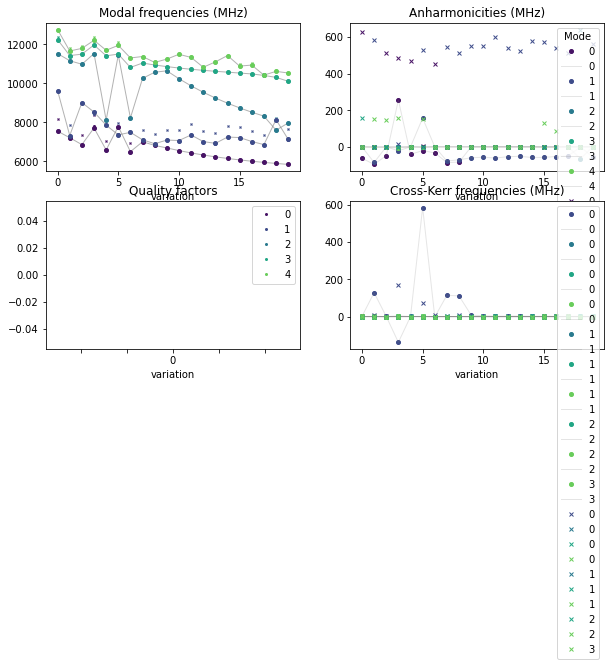

In [20]:
#p = Path('C:\\data-pyEPR\\TwochipV1_May24_22\\V1\\2022-06-02 10-40-37.npz')

epra = epr.QuantumAnalysis(eprh.data_filename)
#epra = epr.QuantumAnalysis(p)
result = epra.analyze_all_variations(cos_trunc = 4, fock_trunc = 4)
epra.plot_hamiltonian_results();

In [ ]:
epra